In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [21]:
shp_path = 'data/raw/stadtkreise/UP_GEMEINDEN_STADTQUARTIERE_F.shp'
sf1 = shp.Reader(shp_path, encoding = "ISO8859-1")

In [22]:
len(sf1.shapes())

239

In [23]:
sf1.records()

[Record #0: [12, 'Rifferswil', 'Affoltern', '', None, 'Gemeinde', 1, 6509791.98405747, 15891.2533675368],
 Record #1: [261, 'Zürich', 'Zürich', 'Friesenberg', 33, 'Gemeinde', 1, 5297365.56092282, 13298.9572162507],
 Record #2: [248, 'Uitikon', 'Dietikon', '', None, 'Gemeinde', 1, 4378204.98610885, 14116.0447778514],
 Record #3: [261, 'Zürich', 'Zürich', 'Albisrieden', 91, 'Gemeinde', 1, 4601382.99302979, 10000.2914910663],
 Record #4: [261, 'Zürich', 'Zürich', 'Alt-Wiedikon', 31, 'Gemeinde', 1, 1692462.30810657, 9256.15698610195],
 Record #5: [261, 'Zürich', 'Zürich', 'Escher Wyss', 52, 'Gemeinde', 1, 1266278.39975649, 7435.11299294097],
 Record #6: [96, 'Regensdorf', 'Dielsdorf', '', None, 'Gemeinde', 1, 14621077.5089921, 20170.5897133583],
 Record #7: [100, 'Stadel', 'Dielsdorf', '', None, 'Gemeinde', 1, 12885619.3851123, 18605.4401925773],
 Record #8: [59, 'Hochfelden', 'Bülach', '', None, 'Gemeinde', 1, 6168778.36428404, 12951.0437842419],
 Record #9: [55, 'Eglisau', 'Bülach', '', 

In [24]:
sf1.records()[0][5]

'Gemeinde'

In [25]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    #records = sf.records()
    records = [x[0:] for x in sf1.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return(df)

In [26]:
df = read_shapefile(sf1)
df.shape

(239, 10)

In [27]:
df.head()

,BFS,GEMEINDENA,BEZIRKSNAM,QUARTIERNA,QUARTIERNU,ART_TEXT,ART_CODE,SHAPE_AREA,SHAPE_LEN,coords
0,12,Rifferswil,Affoltern,,NaN,Gemeinde,1,6.509792e+06,15891.253368,"[(2680429.631000001, 1235062.5340999998), (268..."
1,261,Zürich,Zürich,Friesenberg,33.0,Gemeinde,1,5.297366e+06,13298.957216,"[(2680607.002799999, 1247034.3073999994), (268..."
2,248,Uitikon,Dietikon,,NaN,Gemeinde,1,4.378205e+06,14116.044778,"[(2676260.659000002, 1248138.1950999983), (267..."
3,261,Zürich,Zürich,Albisrieden,91.0,Gemeinde,1,4.601383e+06,10000.291491,"[(2679845.504999999, 1248527.4349999987), (267..."
4,261,Zürich,Zürich,Alt-Wiedikon,31.0,Gemeinde,1,1.692462e+06,9256.156986,"[(2681239.0579999983, 1247192.2219999991), (26..."


In [127]:
df[df.GEMEINDENA=='Winterthur']

,BFS,GEMEINDENA,BEZIRKSNAM,QUARTIERNA,QUARTIERNU,ART_TEXT,ART_CODE,SHAPE_AREA,SHAPE_LEN,coords
18,230,Winterthur,Winterthur,Taggenberg,680.0,Gemeinde,1,2.231412e+06,7423.838568,"[(2695032.7863, 1265470.1541999988), (2695033...."
24,230,Winterthur,Winterthur,Rosenberg,510.0,Gemeinde,1,1.891155e+06,6005.325964,"[(2695827.289000001, 1264493.5320999995), (269..."
25,230,Winterthur,Winterthur,Endliker,730.0,Gemeinde,1,3.896830e+05,3238.654295,"[(2698516.767999999, 1260906.3339999989), (269..."
26,230,Winterthur,Winterthur,Waldegg,320.0,Gemeinde,1,3.853443e+05,2903.073555,"[(2699205.7410000004, 1260399.4519999996), (26..."
27,230,Winterthur,Winterthur,Guggenbühl,220.0,Gemeinde,1,9.928645e+05,5880.006801,"[(2699530.212000001, 1264382.7639999986), (269..."
28,230,Winterthur,Winterthur,Iberg,380.0,Gemeinde,1,1.383290e+06,5434.031321,"[(2700022.2760000005, 1258535.1739999987), (27..."
29,230,Winterthur,Winterthur,Zinzikon,260.0,Gemeinde,1,1.047207e+06,5789.682176,"[(2699525.454, 1264197.8359999992), (2699559.6..."
60,230,Winterthur,Winterthur,Rossberg,440.0,Gemeinde,1,2.379152e+06,9050.883263,"[(2695609.8599999994, 1258717.2850000001), (26..."
61,230,Winterthur,Winterthur,Weinberg,610.0,Gemeinde,1,1.430585e+06,5784.312926,"[(2695534.1259999983, 1264486.3786999993), (26..."
62,230,Winterthur,Winterthur,Eichliacker,430.0,Gemeinde,1,1.219633e+06,6627.139023,"[(2695718.710000001, 1260996.9100000001), (269..."


In [141]:
q = df.loc[df.GEMEINDENA=='Winterthur','QUARTIERNA'].tolist()
q

['Taggenberg',
 'Rosenberg',
 'Endliker',
 'Waldegg',
 'Guggenbühl',
 'Iberg',
 'Zinzikon',
 'Rossberg',
 'Weinberg',
 'Eichliacker',
 'Blumenau',
 'Altstadt',
 'Lind',
 'Büelwiesen',
 'Dättnau',
 'Deutweg',
 'Gotzenwil',
 'Hegi',
 'Stadel',
 'Neuburg',
 'Heiligberg',
 'Waser',
 'Reutlingen',
 'Ricketwil',
 'Niederfeld',
 'Lindenplatz',
 'Tössfeld',
 'Gutschick',
 'Talacker',
 'Sennhof',
 'Oberseen',
 'Eidberg',
 'Hardau',
 'Härti',
 'Schlosstal',
 'Hegmatten',
 'Brühlberg',
 'Grüze',
 'Oberfeld',
 'Neuwiesen',
 'Ganzenbühl',
 'Sonnenberg']

In [32]:
df.GEMEINDENA

0      Rifferswil
1          Zürich
2         Uitikon
3          Zürich
4          Zürich
          ...    
234    Winterthur
235    Winterthur
236        Hinwil
237       Hittnau
238    Turbenthal
Name: GEMEINDENA, Length: 239, dtype: object

In [33]:
def plot_shape(id,sf, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return(x0, y0)

(2700870.506677902, 1258862.7189992017)

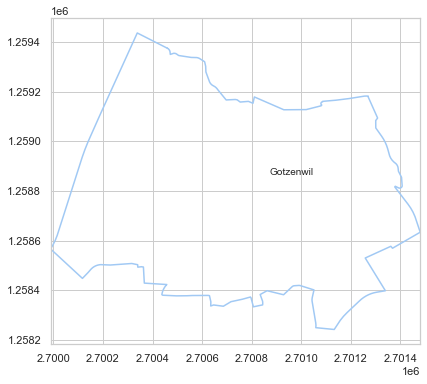

In [34]:
comuna = 'Gotzenwil'
#com_id = df[df.COMUNA == comuna].index.get_values()[0]
com_id = df[df.QUARTIERNA == comuna].index.values[0]
plot_shape(com_id,sf1, comuna)

In [44]:
sf1.shapeRecords()[1].record[2] == 'Winterthur'

'Zürich'

In [158]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        if shape.record[1] == 'Winterthur':
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            plt.plot(x, y, 'k')
            
            if (x_lim == None) & (y_lim == None):
                x0 = np.mean(x)
                y0 = np.mean(y)
                plt.text(x0, y0, id, fontsize=10)
            id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

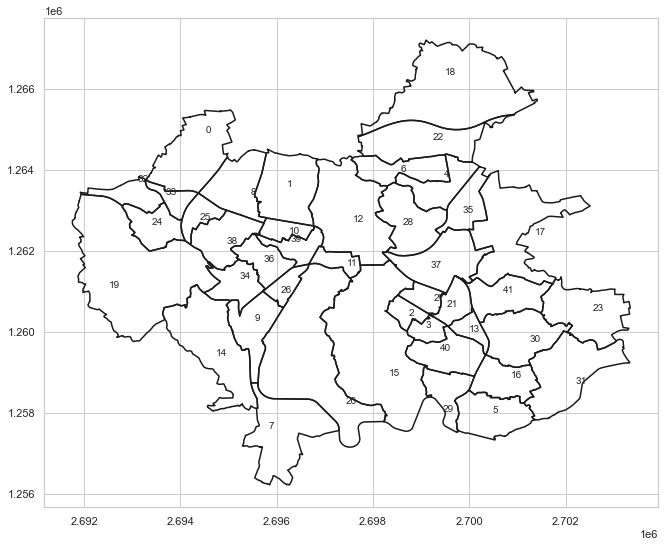

In [159]:
plot_map(sf1)

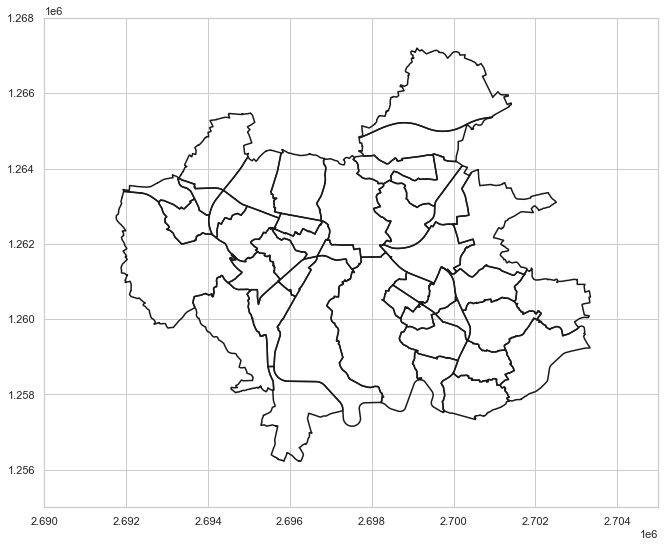

In [162]:
y_lim = (1.255e6,1.268e6) # latitude 
x_lim = (2.69e6, 2.705e6) # longitude
plot_map(sf1, x_lim, y_lim)

In [163]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        if shape.record[1] == 'Winterthur':
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

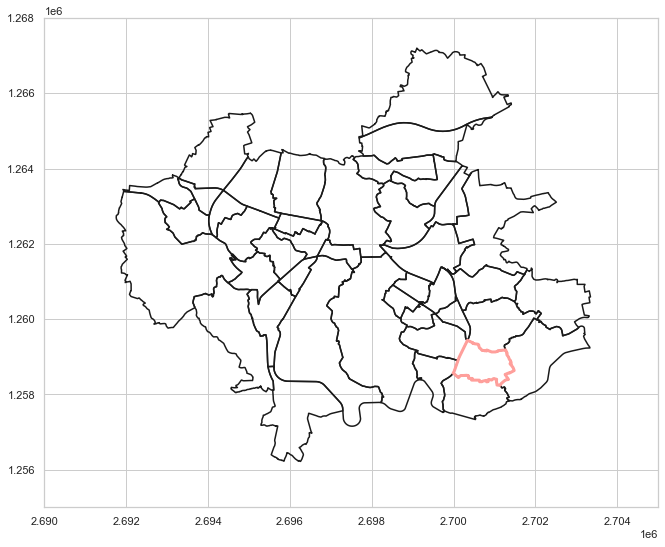

In [164]:
plot_map2(89, sf1, x_lim, y_lim)

In [165]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        if shape.record[1] == 'Winterthur':
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

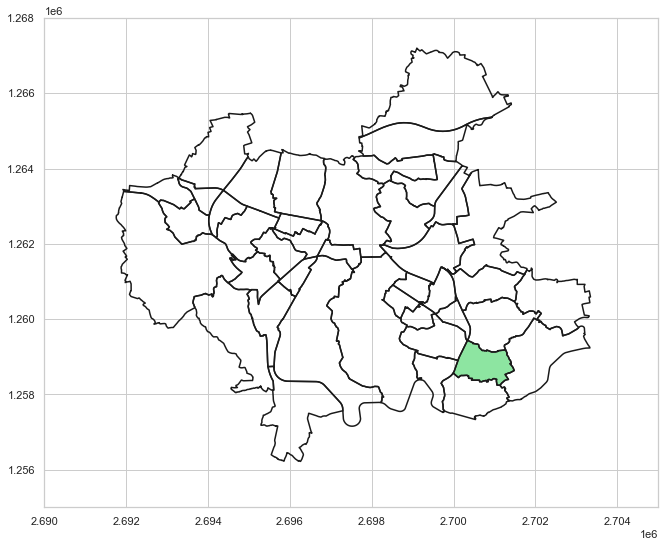

In [166]:
plot_map_fill(89, sf1, x_lim, y_lim, color='g')

In [170]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        if shape.record[1] == 'Winterthur':
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        #plt.text(x0, y0, id, fontsize=10)
        plt.text(x0, y0, sf1.records()[id][3], fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [171]:
sf1.records()[89][3]

'Gotzenwil'

<Figure size 792x648 with 0 Axes>

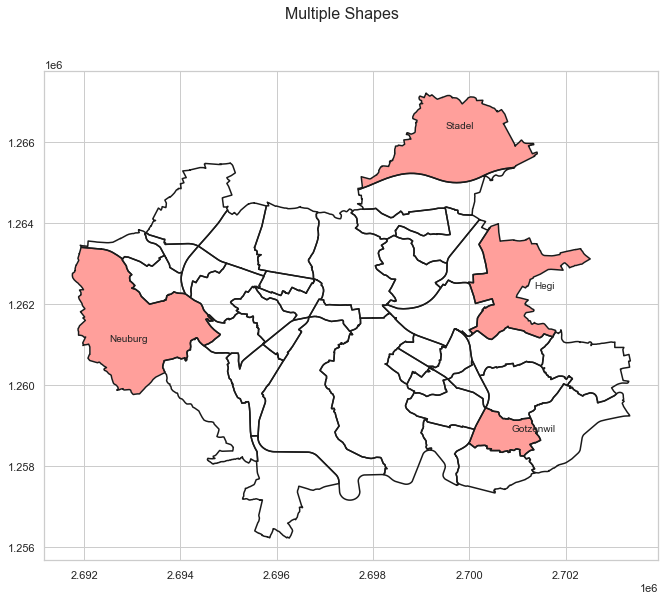

In [172]:
comuna_id = [89, 90, 91, 126]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            comuna_id, sf1, color = 'r')

In [173]:
def plot_comunas_2(sf, title, comunas, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.QUARTIERNA == i]
                         .index.values[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

<Figure size 792x648 with 0 Axes>

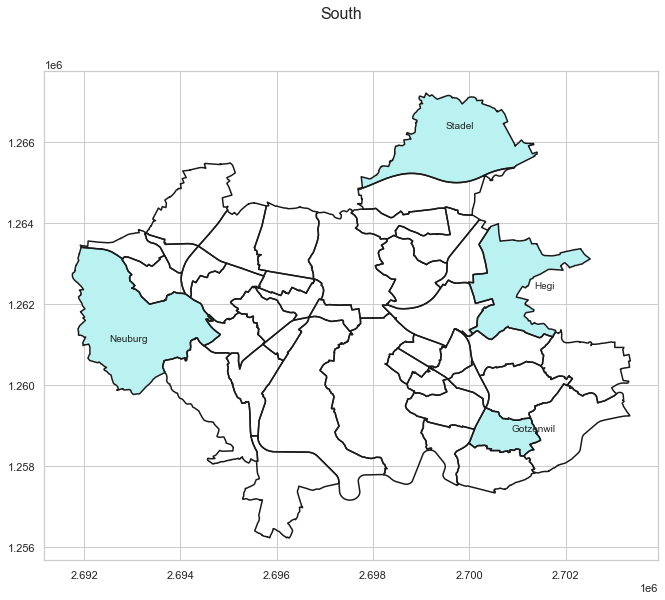

In [174]:
south = ['Gotzenwil','Neuburg','Stadel','Hegi']
#, 'calera de tango', 'buin', 'isla de maipo', 'el bosque', 'paine', 'la granja', 'pedro aguirre cerda', 'lo espejo', 'puente alto', 'san joaquín', 'san miguel', 'pirque', 'san bernardo', 'san ramón', 'la cisterna', 'talagante', 'la pintana']
plot_comunas_2(sf1, 'South', south, 'c')

In [350]:
def calc_color(data, color=None):
        if color == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#403990','#70c6a2','#e6f192','#fddb7f','#f46d45','#a91745']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
        else:
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return(color_ton, bins);

In [369]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  print_id, color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.tight_layout()
    plt.title(title, fontsize=20)
    for shape in sf.shapeRecords():
        if shape.record[1] == 'Winterthur':
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k',linewidth=0.75,alpha=1)
                    
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            #x0 = np.mean(x_lon)
            x0 = np.min(x_lon) + (np.max(x_lon)-np.min(x_lon))/2
            #y0 = np.mean(y_lat)
            y0 = np.min(y_lat) + (np.max(y_lat)-np.min(y_lat))/2
            plt.text(x0, y0, sf1.records()[id][3], fontsize=10,horizontalalignment='center')
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

In [370]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        #i = conv_comuna(i).upper()
        #i = i.upper()
        comuna_id.append(df[df.QUARTIERNA == i].index.values[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));


1: 0 => -1 
2: 0 => -1 
3: 0 => -1 
4: 0 => -1 
5: 0 => -1 
6: 0 => -1 

   1   2   3   4   5   6


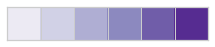

<Figure size 792x648 with 0 Axes>

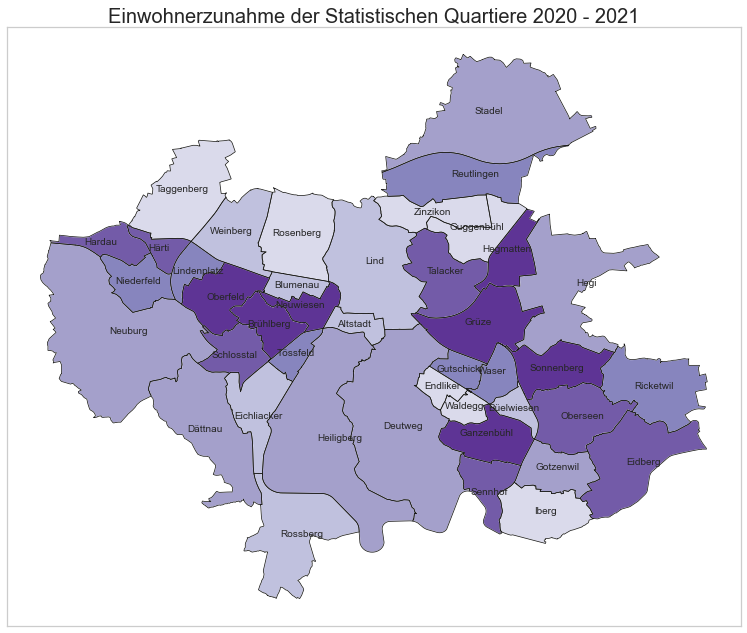

In [375]:
south = ['Gotzenwil','Hegi','Stadel','Neuburg']
south = q
data = [100,2000,1999,3000]
data = [x*0.003 for x in list(range(len(q)))]
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf1, 'Einwohnerzunahme der Statistischen Quartiere 2020 - 2021', south, data, color_pallete, print_id)

In [ ]:
#### ------------------------ Aufgaben:

In [219]:
df1.shape


(43, 34)

In [222]:
df1 = pd.DataFrame(0,index=range(1,43),columns=["ID", "StatQ",]+["EW_"+str(x) for x in range(1990,2023)])
df1.loc[:,"ID"] = range(1,43)
df1.set_index("ID",inplace=True)
df1.loc[:,"StatQ"] = q
df1

,StatQ,EW_1990,EW_1991,EW_1992,EW_1993,EW_1994,EW_1995,EW_1996,EW_1997,EW_1998,...,EW_2013,EW_2014,EW_2015,EW_2016,EW_2017,EW_2018,EW_2019,EW_2020,EW_2021,EW_2022
ID,,,,,,,,,,,,,,,,,,,,,
1,Taggenberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rosenberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Endliker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Waldegg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Guggenbühl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Iberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Zinzikon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Rossberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Weinberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
df2 = pd.DataFrame(0,index=range(1,43),columns=["Quartier",]+["Besch"+str(x) for x in range(1998,2023)])
df2.loc[:,"Quartier"] = q
df2.set_index("Quartier",inplace=True)
df2

,Besch1998,Besch1999,Besch2000,Besch2001,Besch2002,Besch2003,Besch2004,Besch2005,Besch2006,Besch2007,...,Besch2013,Besch2014,Besch2015,Besch2016,Besch2017,Besch2018,Besch2019,Besch2020,Besch2021,Besch2022
Quartier,,,,,,,,,,,,,,,,,,,,,
Taggenberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rosenberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Endliker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Waldegg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guggenbühl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Iberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zinzikon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rossberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Weinberg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
# ------------------------ visualization 1

In [326]:
data_path = '/Users/Derk/Desktop/DatenBevölkerungsWachstum (1).xls'

df3=pd.read_excel(data_path,skiprows=[0,1,3])
df3 = df3[0:33]
df3

,Jahr,Im Gesamten,Wachstum absolut,Wachstum relativ,SchweizerInnen,AusländerInnen,Ausländeranteil
0,2021,117289.0,885.0,0.007603,87957.0,29269.0,0.249546
1,2020,116404.0,912.0,0.007897,87492.0,28849.0,0.247835
2,2019,115492.0,1308.0,0.011455,87061.0,28371.0,0.245653
3,2018,114184.0,1007.0,0.008898,86311.0,27873.0,0.244106
4,2017,113177.0,1056.0,0.009418,85687.0,27490.0,0.242894
5,2016,112121.0,1603.0,0.014504,85080.0,27032.0,0.241097
6,2015,110560.0,1491.0,0.013676,84228.0,26332.0,0.238169
7,2014,109027.0,1228.0,0.011392,83118.0,25909.0,0.237638
8,2013,107799.0,1257.0,0.011798,82420.0,25379.0,0.235429
9,2012,106542.0,1456.0,0.013855,81562.0,24980.0,0.234462


In [328]:

df3["Jahr"] = df3["Jahr"].astype("int")
df3 = df3.sort_values(["Jahr"])
df3["Wachstum Besch"] = (df3["SchweizerInnen"] - df3["SchweizerInnen"].shift(1)) / df3["SchweizerInnen"] * 100
df3 = df3[1:]
df3.head()

,Jahr,Im Gesamten,Wachstum absolut,Wachstum relativ,SchweizerInnen,AusländerInnen,Ausländeranteil,Wachstum Besch
31,1990,88187.0,1562.0,0.018032,69995.0,18192.0,0.206289,0.904350
30,1991,89290.0,1103.0,0.012508,70011.0,19279.0,0.215914,0.022854
29,1992,89006.0,-284.0,-0.003181,69797.0,19209.0,0.215817,-0.306603
28,1993,89432.0,426.0,0.004786,69692.0,19740.0,0.220726,-0.150663
27,1994,89865.0,433.0,0.004842,69691.0,20174.0,0.224492,-0.001435


In [329]:

df3["Wachstum relativ"] = df3["Wachstum relativ"]*100
df3["SchweizerInnen"] = df3["SchweizerInnen"]*0.75

df3["Verhältnis"] = df3["SchweizerInnen"] / df3["Im Gesamten"] * 100
df3

,Jahr,Im Gesamten,Wachstum absolut,Wachstum relativ,SchweizerInnen,AusländerInnen,Ausländeranteil,Wachstum Besch,Verhältnis
31,1990,88187.0,1562.0,1.803175,52496.25,18192.0,0.206289,0.904350,59.528332
30,1991,89290.0,1103.0,1.250751,52508.25,19279.0,0.215914,0.022854,58.806417
29,1992,89006.0,-284.0,-0.318065,52347.75,19209.0,0.215817,-0.306603,58.813732
28,1993,89432.0,426.0,0.478619,52269.00,19740.0,0.220726,-0.150663,58.445523
27,1994,89865.0,433.0,0.484167,52268.25,20174.0,0.224492,-0.001435,58.163078
26,1995,90045.0,180.0,0.200300,51969.00,20753.0,0.230474,-0.575824,57.714476
25,1996,89907.0,-138.0,-0.153257,51782.25,20864.0,0.232062,-0.360645,57.595349
24,1997,89850.0,-57.0,-0.063399,51657.75,20973.0,0.233422,-0.241009,57.493322
23,1998,90180.0,330.0,0.367279,51717.75,21223.0,0.235340,0.116014,57.349468
22,1999,90742.0,562.0,0.623198,51897.00,21546.0,0.237442,0.345396,57.191819


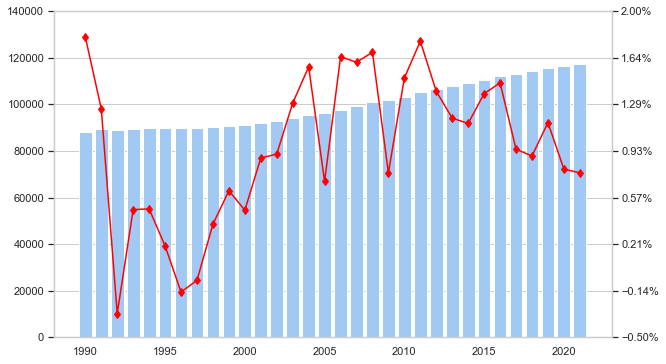

In [293]:
import matplotlib.ticker as mtick


fix, ax = plt.subplots()

plt.bar(df3["Jahr"],df3["Im Gesamten"])
plt.ylim([0, 140000])

#ax.set_xticks(df3.index)
#ax.set_xticklabels(df3["Jahr"], rotation=65)
plt.xticks()

ax.grid(axis='x')
axes2 = plt.twinx()
axes2.plot(df3["Jahr"],df3["Wachstum relativ"], marker='d',color='red')
axes2.set_yticks(np.linspace(axes2.get_yticks()[0], axes2.get_yticks()[-1], len(ax.get_yticks())))
axes2.grid(False)
axes2.set_ylim([-0.5, 2])
#df['a'].plot(kind='line', marker='d', secondary_y=True)
axes2.yaxis.set_major_formatter(mtick.PercentFormatter())


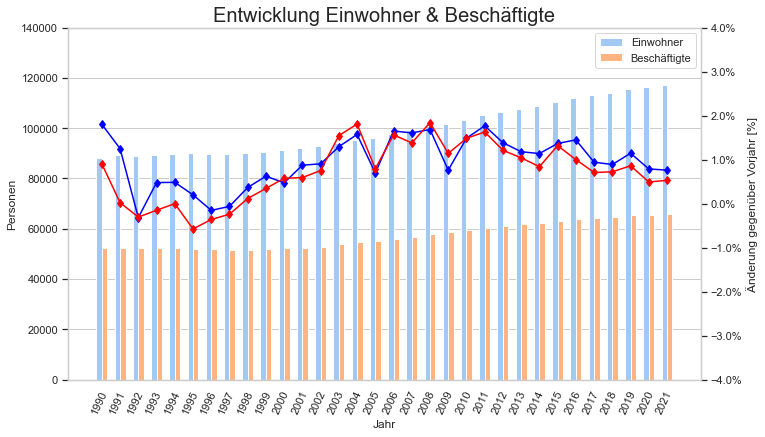

In [346]:
years = df3["Jahr"].tolist()
data1 = df3["Im Gesamten"]
data2 = df3["SchweizerInnen"]

diabete = {key: val for key,val in zip(years, data1)}
not_diabete = {key: val for key,val in zip(years, data2)}

##the actual graph:
fig, ax = plt.subplots(figsize = (10,6))

idx = np.asarray([i for i in range(len(years))])

width = 0.3

ax.bar(idx, [val for key,val in sorted(diabete.items())], width=width)
ax.bar(idx+width, [val for key,val in sorted(not_diabete.items())], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=65)
ax.legend(['Einwohner', 'Beschäftigte'])
ax.set_xlabel('Jahr')
ax.set_ylabel('Personen')
ax.grid(axis='x')
ax.set_ylim([0, 140000])

fig.tight_layout()

axes2 = plt.twinx()
axes2.set_ylabel('Änderung gegenüber Vorjahr [%]')
axes2.plot(idx+0.5*width,df3["Wachstum relativ"], marker='d',color='blue')
axes2.plot(idx+0.5*width,df3["Wachstum Besch"], marker='d',color='red')
axes2.grid(False)
axes2.set_ylim([-4, 4])
#df['a'].plot(kind='line', marker='d', secondary_y=True)

axes2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Entwicklung Einwohner & Beschäftigte",fontsize=20)
plt.show()

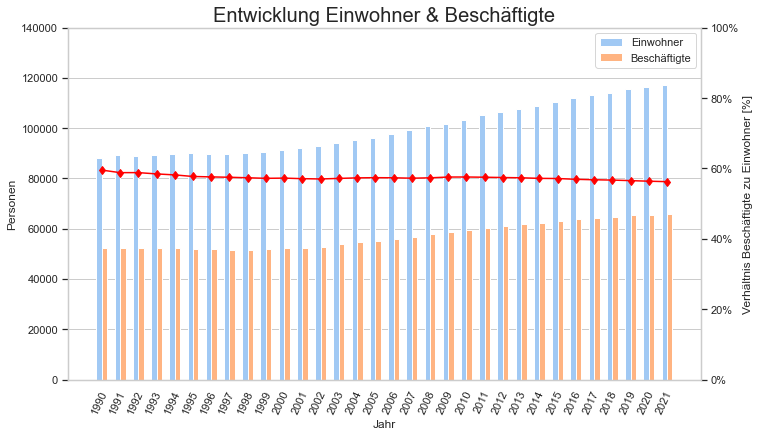

In [348]:
years = df3["Jahr"].tolist()
data1 = df3["Im Gesamten"]
data2 = df3["SchweizerInnen"]

diabete = {key: val for key,val in zip(years, data1)}
not_diabete = {key: val for key,val in zip(years, data2)}

##the actual graph:
fig, ax = plt.subplots(figsize = (10,6))

idx = np.asarray([i for i in range(len(years))])

width = 0.3

ax.bar(idx, [val for key,val in sorted(diabete.items())], width=width)
ax.bar(idx+width, [val for key,val in sorted(not_diabete.items())], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=65)
ax.legend(['Einwohner', 'Beschäftigte'])
ax.set_xlabel('Jahr')
ax.set_ylabel('Personen')
ax.grid(axis='x')
ax.set_ylim([0, 140000])

fig.tight_layout()

axes2 = plt.twinx()
axes2.set_ylabel('Verhältnis Beschäftigte zu Einwohner [%]')
axes2.plot(idx+0.5*width,df3["Verhältnis"], marker='d',color='red')
axes2.grid(False)
axes2.set_ylim([0, 100])
#df['a'].plot(kind='line', marker='d', secondary_y=True)

axes2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Entwicklung Einwohner & Beschäftigte",fontsize=20)
plt.show()